In [13]:
# Business Understanding

In [14]:
# Question I am trying to answer: "What combination of skills, technologies, and experience levels are most strongly associated with high-salary developer roles in the US?"

# Questions blog post will answer:
# 1) What are the most important features of the data set, what do they mean, and how do they drive the predicted outcome? 
# 2) What unusual, or creative, insights are you able to gather from the data set?
# 3) How accurate is the model that you have trained to predict the data in the data set?
# 4) What will happen in a creative, predictive, scenario using the model that you have trained?

In [15]:
#Data Understanding

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os

current_directory = Path(os.getcwd())
raw_data = pd.read_csv(current_directory / 'Developer Survey' /'survey_results_public.zip', compression = "zip")


In [17]:
#Getting General Information
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [18]:
#Checking for nulls values
raw_data.isna().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [19]:
#Checking data types
raw_data.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [20]:
raw_data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [21]:
#Data Exploration Findings
    #- There are many null values that I will need to account for before modeling    
    #- There are many columns with object data types that I will need to account for before modeling
    #- There are some columns that have multiple choice answers that have a ';' delimiter
    #- There are many rows that have null values since different sections of the survey are optional so many respondants partially reply to survey
#Survey Exploration Findings
    #- There were many people surveys that I should exclude based on the business question
    #- There is a question where you answer "Apples" if you are paying attention. All rows withouts apples in that column should be deleted
    #- There are many questions that are unlikely to have a strong relationship with business question (ex: section dedicated to Stack Overflow usage, survey length)

In [22]:
#Data Preparation

In [23]:
#Removing all rows without apples in column "Check"
data_apples = raw_data[raw_data['Check'] == "Apples"]
data_apples.info()

#No rows were removed. Likely these responses were filtered prior to publishing dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 57.4+ MB


In [24]:
#Removing all rows where respondent doesn't use coding professionally or are not currently working

#list of responses that say they currently code in some capacity professionally
pro_dev_responses = ['I am a developer by profession', 'I am not primarily a developer, but I write code sometimes as part of my work/studies']

#list of employment status responses to exclude (there are some respondants who picked every option so exluding is better than including)
pro_emp_responses = ['Not employed, but looking for work', 'Not employed, and not looking for work', 'Student, full-time', 'Retired', 'I prefer not to say', 'Student, part-time']

#Filtering data by if they code professionally
pro_data = data_apples.loc[data_apples['MainBranch'].isin(pro_dev_responses)]

#Filtering data by employement status
pro_data_employment = pro_data['Employment'].str.split(';', expand = True)
pro_data_employment_keys = pro_data_employment.keys()
pro_data_employment_mask = ~pro_data_employment[pro_data_employment_keys].isin(pro_emp_responses).any(axis = 1)
pro_data = pro_data.loc[pro_data_employment_mask]

pro_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47454 entries, 0 to 65435
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 41.6+ MB


In [25]:
#Verifying that rows were filtered correctly
print(pro_data['MainBranch'].value_counts())

I am a developer by profession                                                           43470
I am not primarily a developer, but I write code sometimes as part of my work/studies     3984
Name: MainBranch, dtype: int64


In [26]:
#Filtering to only respondants that answered the TeamsQuestions portion of the survey
#This is important as there are a few questions that give insight into how long they have had their job, independence and organizational influence

teams_filtered_data = pro_data.loc[pro_data['TBranch'] == 'Yes']

In [27]:
#Filtering to only respondants that answered the salary question

teams_filtered_data.dropna(subset= ['CompTotal'], inplace = True)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [28]:
#Filtering to only respondants who reside in the US

country_filtered_data = teams_filtered_data[teams_filtered_data['Country'] == "United States of America"]
currency_filtered_data = country_filtered_data[country_filtered_data['Currency'] == "USD	United States dollar"]

In [29]:
#Function to check number of null values in each column

def check_null (df):
    nan_counts = df.isna().sum()
    if nan_counts.sum() > 0:
        for column in nan_counts.keys():
            if df[column].isna().sum() > 0:
                print(column + " - " + str(df[column].isna().sum()) )
    else:
        print('No null values in the dataframe')

In [30]:
#Column count of NAN values

check_null(currency_filtered_data)

#nan_counts show that many select all that apply style question columns are responisble for NAN values.

CodingActivities - 1
LearnCode - 2
LearnCodeOnline - 714
TechDoc - 1082
YearsCode - 1
YearsCodePro - 5
DevType - 4
OrgSize - 1
PurchaseInfluence - 1
BuyNewTool - 165
BuildvsBuy - 219
TechEndorse - 204
LanguageHaveWorkedWith - 11
LanguageWantToWorkWith - 231
LanguageAdmired - 470
DatabaseHaveWorkedWith - 587
DatabaseWantToWorkWith - 1124
DatabaseAdmired - 1400
PlatformHaveWorkedWith - 922
PlatformWantToWorkWith - 1560
PlatformAdmired - 1767
WebframeHaveWorkedWith - 1054
WebframeWantToWorkWith - 1497
WebframeAdmired - 1761
EmbeddedHaveWorkedWith - 2857
EmbeddedWantToWorkWith - 3141
EmbeddedAdmired - 3200
MiscTechHaveWorkedWith - 1467
MiscTechWantToWorkWith - 1913
MiscTechAdmired - 2169
ToolsTechHaveWorkedWith - 330
ToolsTechWantToWorkWith - 786
ToolsTechAdmired - 935
NEWCollabToolsHaveWorkedWith - 36
NEWCollabToolsWantToWorkWith - 368
NEWCollabToolsAdmired - 443
OpSysPersonal use - 37
OpSysProfessional use - 211
OfficeStackAsyncHaveWorkedWith - 377
OfficeStackAsyncWantToWorkWith - 1153
O

In [31]:
#Removing columns unrelated to business question



col_filtered_data = country_filtered_data.drop(columns = ['Check', 'SurveyLength', 'SurveyEase', 'AIChallenges', 'AIEthics', 'AIThreat', 'AINextMuch more integrated', 'AINextNo change',
                                         'AINextMore integrated', 'AINextLess integrated', 'AINextMuch less integrated', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse',
                                          'LanguageWantToWorkWith', 'DatabaseWantToWorkWith', 'LanguageAdmired', 'DatabaseAdmired', 'PlatformWantToWorkWith',
                                           'PlatformAdmired', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechWantToWorkWith',
                                             'MiscTechAdmired', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired',
                                               'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired',
                                                  'AISearchDevWantToWorkWith', 'AISearchDevAdmired', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOHow', 'SOComm',
                                                    'AISent', 'AIBen', 'AIAcc', 'AIComplex', 'AIToolInterested in Using', 'AIToolNot interested in Using', 'JobSatPoints_1', 
                                                      'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
                                                        'JobSatPoints_11', 'JobSat', 'ConvertedCompYearly', "TBranch", 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5',
                                                            'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching', 'TimeAnswering',
                                                               'Frustration', 'ProfessionalTech', 'ProfessionalCloud', 'ProfessionalQuestion', 'OrgSize', 'PurchaseInfluence', 'Country', 'Currency'     ])

#Notes on column removal justification:

#Check - mark Apples if you are paying attention. This has already been used for filtering so this is no longer required
#SurveyLength - question regarding quality of survey
#SurveyEase - question regarding quality of survey
#AIChallenges - question about opinions on AI and is unrrelated to professional coding experience
#AIEthics - question about opinions on AI and is unrrelated to professional coding experience
#AIThreat - question about opinions on AI and is unrrelated to professional coding experience
#AINextMuch more integrated - question about opinions on AI usage in the future and is unrrelated to current professional coding
#AINextNo change - question about opinions on AI usage in the future and is unrrelated to current professional coding
#AINextMore integrated - question about opinions on AI usage in the future and is unrrelated to current professional coding
#AINextLess integrated - question about opinions on AI usage in the future and is unrrelated to current professional coding
#AINextMuch less integrated - question about opinions on AI usage in the future and is unrrelated to current professional coding
#BuyNewTool - question is about new software preferences and is unrrelated to professional coding
#BuildvsBuy - question is about new software preferences and is unrrelated to professional coding
#TechEndorse - question is about new software preferences and is unrrelated to professional coding
#LanguageWantToWorkWith - question is not about professional coding experience
#DatabaseWantToWorkWith - question is not about professional coding experience
#LanguageAdmired - question is not about professional coding experience
#DatabaseAdmired - question is not about professional coding experience 
#PlatformWantToWorkWith - question is not about professional coding experience 
#PlatformAdmired - question is not about professional coding experience 
#WebframeWantToWorkWith - question is not about professional coding experience 
#WebframeAdmired - question is not about professional coding experience  
#EmbeddedWantToWorkWith - question is not about professional coding experience  
#EmbeddedAdmired - question is not about professional coding experience  
#MiscTechWantToWorkWith - question is not about professional coding experience
#MiscTechAdmired - question is not about professional coding experience
#ToolsTechWantToWorkWith - question is not about professional coding experience
#ToolsTechAdmired - question is not about professional coding experience
#NEWCollabToolsWantToWorkWith - question is not about professional coding experience
#NEWCollabToolsAdmired - question is not about professional coding experience
#OfficeStackAsyncWantToWorkWith - question is not about professional coding experience
#OfficeStackAsyncAdmired - question is not about professional coding experience
#OfficeStackSyncWantToWorkWith - question is not about professional coding experience
#OfficeStackSyncAdmired - question is not about professional coding experience
#AISearchDevWantToWorkWith - question is not about professional coding experience
#AISearchDevAdmired - question is not about professional coding experience
#NEWSOSites - question is about Stack Overflow and not about professional coding experience
#SOVisitFreq - question is about Stack Overflow and not about professional coding experience
#SOAccount - question is about Stack Overflow and not about professional coding experience
#SOPartFreq - question is about Stack Overflow and not about professional coding experience
#SOHow - question is about Stack Overflow and not about professional coding experience
#SOComm - question is about Stack Overflow and not about professional coding experience
#AISent - question about opinions on AI and is unrrelated to professional coding experience
#AIBen - question about opinions on AI and is unrrelated to professional coding experience
#AIAcc - question about opinions on AI and is unrrelated to professional coding experience
#AIComplex - question about opinions on AI and is unrrelated to professional coding experience
#AIToolInterested in Using - question about opinions on AI and is unrrelated to professional coding experience
#AIToolNot interested in Using - question about opinions on AI and is unrrelated to professional coding experience
#JobSatPoints 1,4,5,6,7,8,9,10,11 - question is about job satisfaction and is unrrelated to professional coding experience
#Job Sat - question is about job satisfaction and is unrrelated to professional coding experience
#ConvertedCompYearly - Column seems unreliable as there are some rows with comp data input but a null converted comp yearly. 
#TBranch - Column already used for filtering
#Knowledge 1,2,3,4,5,6,7,8,9 - Question applies to internal processes and tools and are not indicative of skills or background
#Frequency 1,2,3 - Question applies to internal processes and are not indicative of skills or background
#TimeSearching - Question does show skill level, but is too broad as to not give actionable insights
#TimeAnswering - Question applies to internal processes and are not indicative of skills or background
#Frustration - Question applies to internal processes and are not indicative of skills or background
#ProfessionalTech - Question applies to internal processes and are not indicative of skills or background
#ProfessionalCloud - Question applies to internal processes and are not indicative of skills or background
#ProfessionalQuestion - Question applies to internal processes and are not indicative of skills or background
#OrgSize - Organization size is not under control of respondant 
#PurchaseInfluence - Amount of purchasing influence an individual has could be based on skill/reputation, but is not actionable and could be affected by variables out of respondant control
#Country - This has already been used for filtering so this is no longer required
#Currency - This has already been used for filtering so this is no longer required


In [32]:
#Function for breaking up select all that apply questions

def select_all(column, select_all_df):
    df_expanded = select_all_df[column].str.get_dummies(sep = ';')
    df_expanded = df_expanded.add_prefix(f"{column}__")
    select_all_df = select_all_df.join(df_expanded)
    select_all_df.drop(columns=[column], inplace=True)
    return select_all_df

In [33]:
#Breaking up select all that apply questions

select_all_data = col_filtered_data.copy()
select_all_columns = ['Employment', 'CodingActivities', 'LearnCode', 'LearnCodeOnline', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 
           'WebframeHaveWorkedWith', 'EmbeddedHaveWorkedWith', 'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'OpSysPersonal use',
            'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackSyncHaveWorkedWith', 'AISearchDevHaveWorkedWith', 'AIToolCurrently Using', 'TechDoc' ]

for column in select_all_columns:
    select_all_data = select_all(column, select_all_data)




In [34]:
#Null Value Check following select all cleanup
check_null(select_all_data)


YearsCode - 1
YearsCodePro - 5
DevType - 4
ICorPM - 9
WorkExp - 17
Industry - 95


In [35]:
#Removing final Null Values
remove_na_data = select_all_data.copy()

#Checking if any rows have many null values (bad respondant)
nan_per_row = remove_na_data.isnull().sum(axis= 1)
max_nan_cnt = nan_per_row.max()

#max_nan_cnt is relatively low (4) so rows will be kept as other values are useful to the model
#Replacing null values with "Missing" due to low total count of null in column

remove_na_data['YearsCode'] = remove_na_data['YearsCode'].fillna('Missing')
remove_na_data['YearsCodePro'] = remove_na_data['YearsCodePro'].fillna('Missing')
remove_na_data['DevType'] = remove_na_data['DevType'].fillna('Missing')
remove_na_data['ICorPM'] = remove_na_data['ICorPM'].fillna('Missing')
remove_na_data['WorkExp'] = remove_na_data['WorkExp'].fillna('Missing')
remove_na_data['Industry'] = remove_na_data['Industry'].fillna('Missing')


In [36]:
#Final Null Check

check_null(remove_na_data)


No null values in the dataframe


In [37]:
#Removing Salary Outliers
#Outliers need to be removed from this dataset as there are some cases of respondants filling in values that are unrealistically low (ex. $1)
salary_outlier_data = remove_na_data.copy()

print('Data description before outlier removal')
print(salary_outlier_data['CompTotal'].describe())
print(salary_outlier_data['CompTotal'].median())

#IQR based outlier removal is used

q_low = salary_outlier_data['CompTotal'].quantile(0.05)
q_high = salary_outlier_data['CompTotal'].quantile(0.95)
cleaned_data = salary_outlier_data[(salary_outlier_data['CompTotal'] >= q_low) & (salary_outlier_data['CompTotal'] <= q_high)]

print('Data description after outlier removal')
print(cleaned_data['CompTotal'].describe())


Data description before outlier removal
count    4.495000e+03
mean     2.471886e+11
std      1.657268e+13
min      0.000000e+00
25%      1.100000e+05
50%      1.500000e+05
75%      2.000000e+05
max      1.111111e+15
Name: CompTotal, dtype: float64
150000.0
Data description after outlier removal
count      4057.000000
mean     156541.280010
std       54795.611016
min       70000.000000
25%      115000.000000
50%      150000.000000
75%      190000.000000
max      333000.000000
Name: CompTotal, dtype: float64


In [38]:
#Checking and correcting data types

cleaned_data.dtypes

#Object data types remain. removing with get_dummies

object_columns = cleaned_data.select_dtypes(include=['object']).columns.tolist()
model_data = pd.get_dummies(cleaned_data, columns = object_columns)

In [39]:
#Modeling

In [ ]:
#Creating train test split

from sklearn.model_selection import train_test_split

#Creating the train_test_split
X = model_data.drop('CompTotal',axis=1)
y = model_data['CompTotal']

(X_train, X_test, y_train, y_test) = train_test_split(X,y, test_size = .2, random_state = 7)





In [ ]:
#UNSUCCESSFUL Creating, training and evaluating RandomForestRegression model
#Model failed to surpass ~.33 R2 and ~$45,000 RMSE with feature select based on importance and decision tree structure tuning
#HistGradientBoostingRegressor model performed better

#base_model = RandomForestRegressor(random_state= 7)

#base_model.fit(X_train, y_train)

##importances = base_model.feature_importances_
#feature_names = X_train.columns
#top_indices = np.argsort(importances)[-150:]
#top_features = feature_names[top_indices]

#X_train_top = X_train[top_features]
#X_test_top = X_test[top_features]

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 25, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 10],
    'n_estimators': [50, 100, 200]
}

model = RandomForestRegressor(random_state= 7)

random_search = RandomizedSearchCV(estimator=model, n_iter= 50 ,param_distributions=param_grid, scoring= 'r2', cv=3, verbose = 3, n_jobs = -1, random_state = 8)


random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best R2 score:", random_search.best_score_)



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 25}
Best Mean Squared Error score: 0.2932751263286608


In [53]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error, r2_score


model = random_search.best_estimator_
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)


print("MAE on predictions: ",mae) 
print("R2 Score on predictions: ", r2)

MAE on predictions:  35925.084507925305
R2 Score on predictions:  -2.709082941425188


In [51]:
#Answering business question:
#"What combination of skills, technologies, and experience levels are most strongly associated with high-salary developer roles in the US?"


importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)


print(feature_importance)

                                  feature  importance
341          OpSysProfessional use__MacOS    0.044151
0                              ResponseId    0.035125
390  OfficeStackSyncHaveWorkedWith__Slack    0.027560
347        OpSysProfessional use__Windows    0.019987
584         DevType_Developer, full-stack    0.019754
..                                    ...         ...
321              OpSysPersonal use__Haiku    0.000000
653                          WorkExp_46.0    0.000000
188          EmbeddedHaveWorkedWith__CUTE    0.000000
313                OpSysPersonal use__AIX    0.000000
507                          YearsCode_50    0.000000

[675 rows x 2 columns]


In [54]:
#Splitting features back into business question related categories

base_skill_columns = ['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'EmbeddedHaveWorkedWith', 'MiscTechHaveWorkedWith','AISearchDevHaveWorkedWith']                 
base_tech_columns = ['ToolTechHaveWorkedWith' , 'NewCollabToolsHaveWorkedWith', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith','OfficeStackSyncHaveWorkedWith','AIToolCurrently Using']
base_experience_columns = ['RemoteWork', 'CodingActivities', 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType','ICorPM','WorkExp', 'Industry' ]

skill_columns = [col for col in model_data.columns if any(term in col for term in base_skill_columns)]
tech_columns = [col for col in model_data.columns if any(term in col for term in base_tech_columns)]
experience_columns = [col for col in model_data.columns if any(term in col for term in base_experience_columns)]


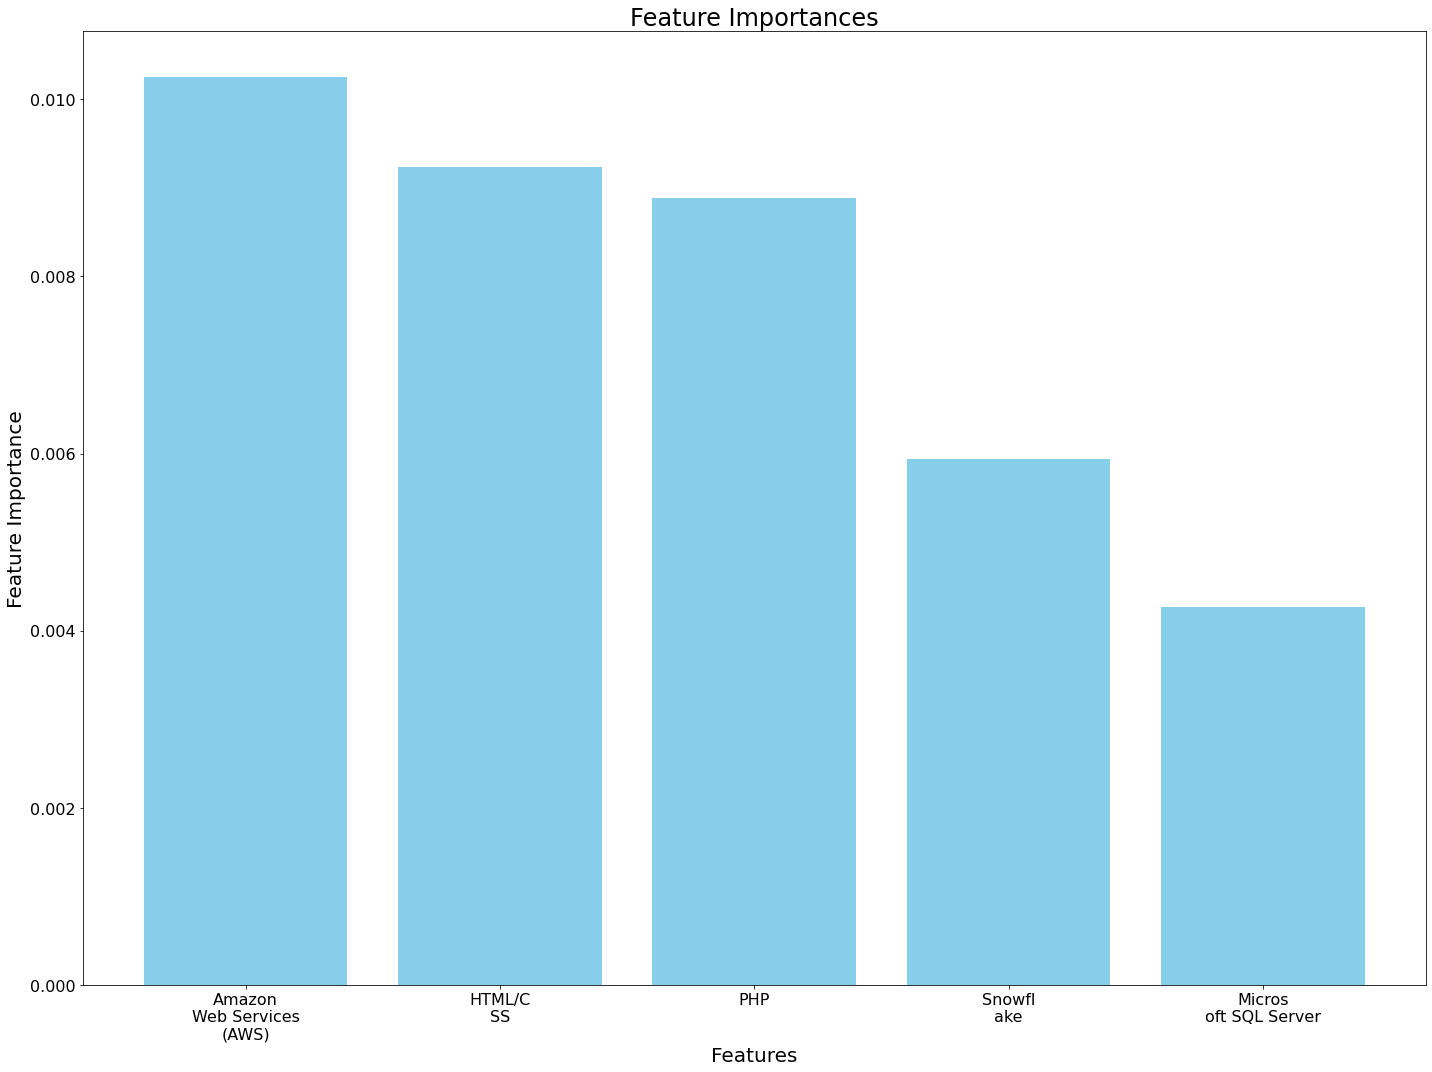

In [76]:
#1 What skills are the most important?
import textwrap

skill_columns = pd.Series(skill_columns)
skill_columns.name = 'feature'

skill_features = pd.merge(skill_columns, feature_importance, how = 'left')
top_skill_features = skill_features.sort_values(by='importance', ascending=False).head(5)

wrapped_labels = ["\n".join(textwrap.wrap(label, 15)) for label in top_skill_features['feature']]
wrapped_labels = [text.rsplit("_", 1)[1] if "_" in text else text for text in wrapped_labels]

plt.figure(figsize=(20, 15))
plt.bar(wrapped_labels, top_skill_features['importance'], color='skyblue')
plt.xlabel('Features', fontsize=20)
plt.ylabel('Feature Importance', fontsize=20)
plt.title('Feature Importances', fontsize=24)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()



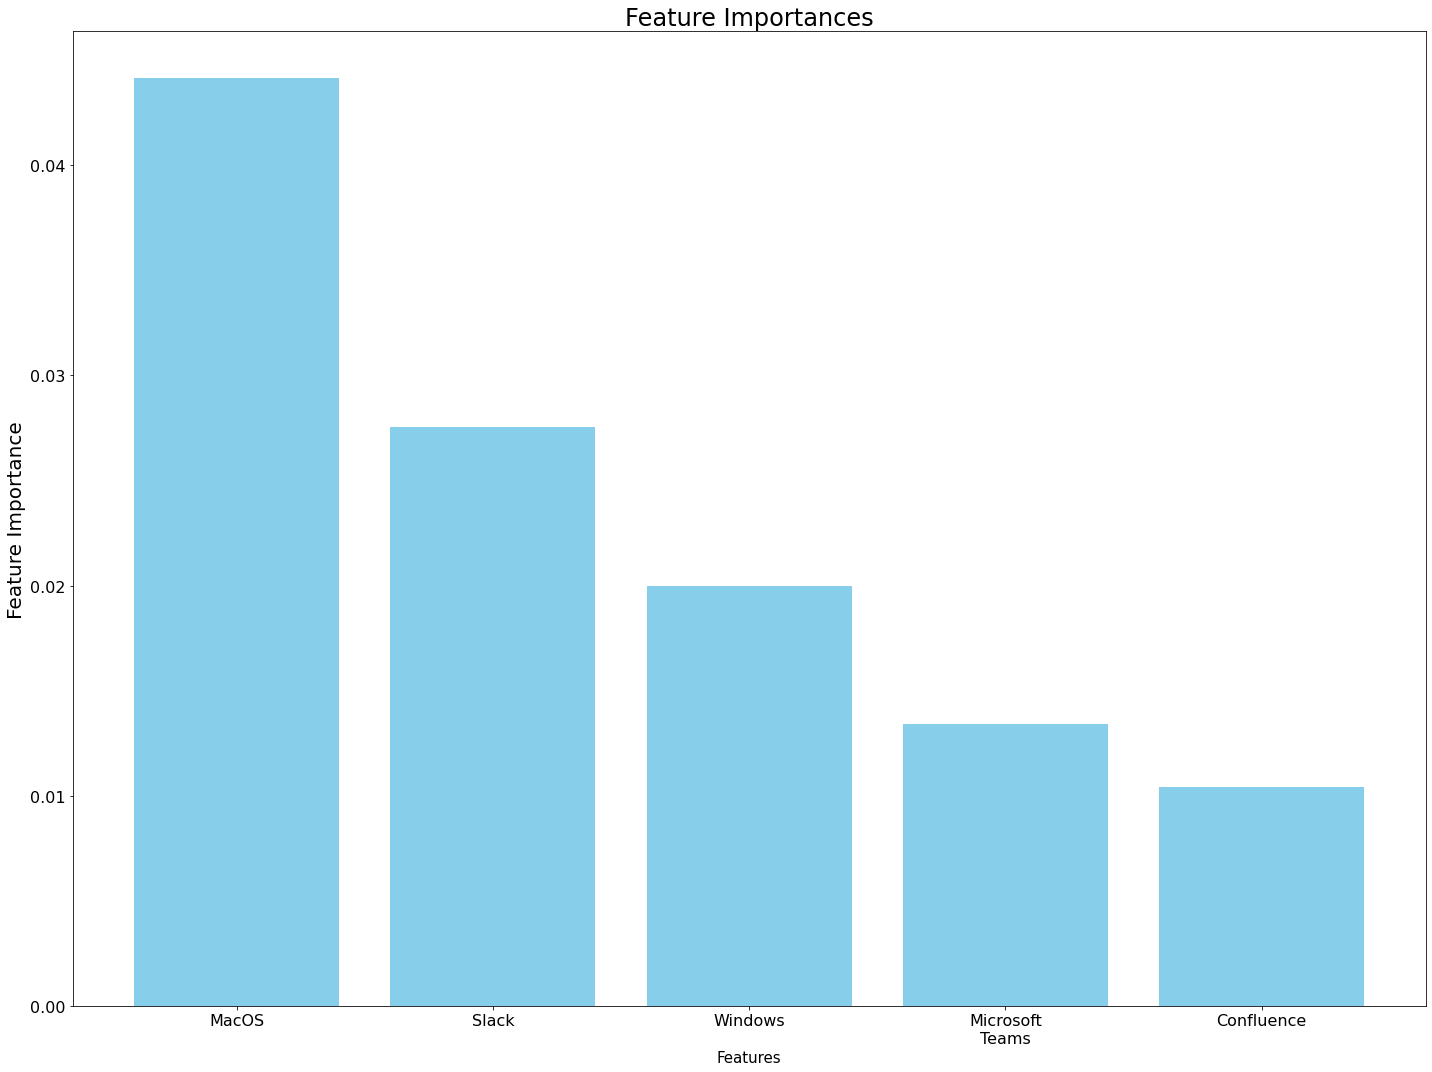

In [77]:

#2 what technologies are the most important?

tech_columns = pd.Series(tech_columns)
tech_columns.name = 'feature'

tech_features = pd.merge(tech_columns, feature_importance, how = 'left')
top_tech_features = tech_features.sort_values(by='importance', ascending=False).head(5)

wrapped_labels = ["\n".join(textwrap.wrap(label, 15)) for label in top_tech_features['feature']]
wrapped_labels = [text.rsplit("_", 1)[1] if "_" in text else text for text in wrapped_labels]

plt.figure(figsize=(20, 15))
plt.bar(wrapped_labels, top_tech_features['importance'], color='skyblue')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature Importance', fontsize=20)
plt.title('Feature Importances', fontsize=24)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

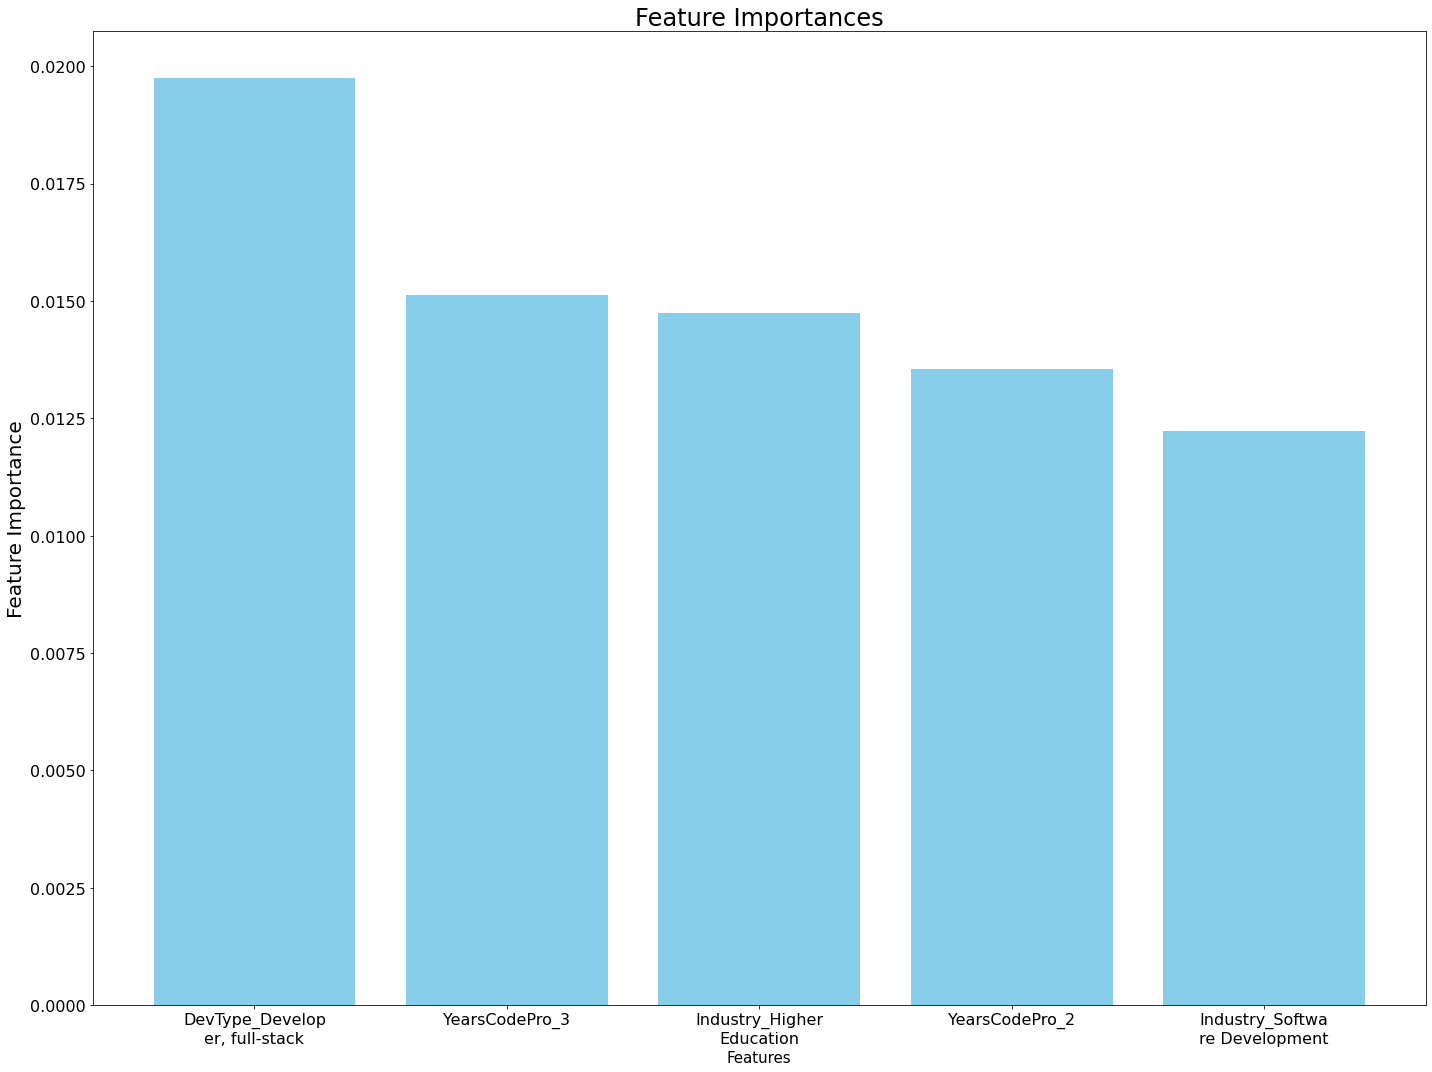

In [79]:
#3 How important is experience level?

experience_columns = pd.Series(experience_columns)
experience_columns.name = 'feature'

experience_features = pd.merge(experience_columns, feature_importance, how = 'left')
top_experience_features = experience_features.sort_values(by='importance', ascending=False).head(5)

wrapped_labels = ["\n".join(textwrap.wrap(label, 15)) for label in top_experience_features['feature']]


plt.figure(figsize=(20, 15))
plt.bar(wrapped_labels, top_experience_features['importance'], color='skyblue')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature Importance', fontsize=20)
plt.title('Feature Importances', fontsize=24)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()